# 1基础代码

In [62]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore") 

## 1.1 读取数据

In [63]:
# 训练数据前10000行，测试数据前100条
train_data = pd.read_csv('./data/train_all.csv',nrows=10000)
test_data = pd.read_csv('./data/test_all.csv',nrows=100)

In [64]:
train_data.head()

,user_id,merchant_id,age_range,gender,user_cnt,seller_nunique,cat_nunique,brand_nunique,item_nunique,time_stamp_nunique,...,embeeding_93,embeeding_94,embeeding_95,embeeding_96,embeeding_97,embeeding_98,embeeding_99,lgb_clf,xgb_clf,label
0,105600.0,1487.0,6.0,1.0,310.0,96.0,37.0,88.0,217.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.942560,0.941660,0.0
1,110976.0,159.0,5.0,0.0,274.0,181.0,70.0,159.0,233.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.933391,0.927695,0.0
2,374400.0,302.0,5.0,1.0,278.0,57.0,59.0,62.0,148.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.923382,0.909905,0.0
3,189312.0,1760.0,4.0,0.0,237.0,49.0,35.0,45.0,170.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.940141,0.940140,0.0
4,189312.0,2511.0,4.0,0.0,237.0,49.0,35.0,45.0,170.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.930960,0.949015,0.0


In [65]:
test_data.head()

,user_id,merchant_id,age_range,gender,user_cnt,seller_nunique,cat_nunique,brand_nunique,item_nunique,time_stamp_nunique,...,embeeding_92,embeeding_93,embeeding_94,embeeding_95,embeeding_96,embeeding_97,embeeding_98,embeeding_99,lgb_clf,xgb_clf
0,105600.0,1487.0,6.0,1.0,310.0,96.0,37.0,88.0,217.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.936660,0.931692
1,110976.0,159.0,5.0,0.0,274.0,181.0,70.0,159.0,233.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.941681,0.934976
2,374400.0,302.0,5.0,1.0,278.0,57.0,59.0,62.0,148.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.926634,0.922883
3,189312.0,1760.0,4.0,0.0,237.0,49.0,35.0,45.0,170.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.939729,0.945877
4,189312.0,2511.0,4.0,0.0,237.0,49.0,35.0,45.0,170.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.941506,0.947046


In [66]:
# 读取全部数据
# train_data = pd.read_csv('train_all.csv',nrows=None)
# test_data = pd.read_csv('test_all.csv',nrows=None)

In [67]:
train_data.columns

Index(['user_id', 'merchant_id', 'age_range', 'gender', 'user_cnt',
       'seller_nunique', 'cat_nunique', 'brand_nunique', 'item_nunique',
       'time_stamp_nunique',
       ...
       'embeeding_93', 'embeeding_94', 'embeeding_95', 'embeeding_96',
       'embeeding_97', 'embeeding_98', 'embeeding_99', 'lgb_clf', 'xgb_clf',
       'label'],
      dtype='object', length=231)

## 1.2 获取训练和测试数据

In [68]:
features_columns = [col for col in train_data.columns if col not in ['user_id','label']]
train = train_data[features_columns].values
test = test_data[features_columns].values
target =train_data['label'].values

## 1.3 切分40%数据用于线下验证

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)  

(5073, 229) (5073,)
(3382, 229) (3382,)


0.936428149024246

# 2 简单验证

## 2.1 交叉验证

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, n_jobs=-1)
scores = cross_val_score(clf, train, target, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) 

[0.93 0.93 0.93 0.93 0.93]
Accuracy: 0.93 (+/- 0.00)


## 2.2 F1验证

In [71]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, n_jobs=-1)
scores = cross_val_score(clf, train, target, cv=5, scoring='f1_macro')
print(scores)  
print("F1: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.48 0.48 0.48 0.48 0.48]
F1: 0.48 (+/- 0.00)


# 3 设置交叉验证方法

## 3.1 使用ShuffleSplit切分数据

In [72]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, n_jobs=-1)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, train, target, cv=cv)  

array([0.94, 0.93, 0.93, 0.93, 0.93])

ShuffleSplit 类是 scikit-learn 中用于生成交叉验证划分的工具。它根据给定的随机种子生成随机抽样，从而实现数据集的随机分割。这在分类问题和特征选择中非常有用，因为它可以帮助我们评估不同特征组合的性能。

ShuffleSplit 迭代器将会生成一个用户给定数量的独立的训练/测试数据划分。样例首先被打散然后划分为一对训练测试集合。

ShuffleSplit 类的参数如下：

1. n_splits：表示交叉验证的次数。默认值为 10。
2. test_size：表示测试集的大小。默认值为 0.1。
3. train_size：表示训练集的大小。默认为原始数据集的大小减去测试集的大小。
4. random_state：表示随机种子。用于确保结果的可重复性。

## 3.2 使用KFlod切分数据

In [73]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, n_jobs=-1)
kf = KFold(n_splits=5)
for k, (train_index, test_index) in enumerate(kf.split(train)):
    X_train, X_test, y_train, y_test = train[train_index], train[test_index], target[train_index], target[test_index]
    clf = clf.fit(X_train, y_train)
    print(k, clf.score(X_test, y_test))

0 0.9319929036073329
1 0.9331756357185098
2 0.9302188054405677
3 0.9331756357185098
4 0.9325842696629213


## 3.3 StratifiedKFold切分数据(label均分)

In [74]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, n_jobs=-1)
skf = StratifiedKFold(n_splits=5)
for k, (train_index, test_index) in enumerate(skf.split(train, target)):
    X_train, X_test, y_train, y_test = train[train_index], train[test_index], target[train_index], target[test_index]
    clf = clf.fit(X_train, y_train)
    print(k, clf.score(X_test, y_test))

0 0.9325842696629213
1 0.9325842696629213
2 0.9319929036073329
3 0.9319929036073329
4 0.9319929036073329


StratifiedKFold 交叉验证是一种用于评估分类模型的方法。它根据数据的离散性（或称分布）来划分训练集和测试集，以确保测试集的变化与整体数据分布一致。多用于样本正负比例不平衡的分类问题中。

StratifiedKFold 的参数如下：

n_splits：表示交叉验证的次数。默认值为 5。
shuffle：表示是否随机打乱数据集。默认为 True。
random_state：表示随机种子。用于确保结果的可重复性。

# 4 模型调参
对模型调参，然后预测并评估模型性能。

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.5, random_state=0)

# model 
clf = RandomForestClassifier(n_jobs=-1)

# Set the parameters by cross-validation

tuned_parameters = {
                    'n_estimators': [50, 100, 200]
#                     ,'criterion': ['gini', 'entropy']
#                     ,'max_depth': [2, 5]
#                     ,'max_features': ['log2', 'sqrt', 'int']
#                     ,'bootstrap': [True, False]
#                     ,'warm_start': [True, False]
                    }

scores = ['precision']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(clf, tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'n_estimators': 100}

Grid scores on development set:

0.463 (+/-0.000) for {'n_estimators': 50}
0.463 (+/-0.001) for {'n_estimators': 100}
0.463 (+/-0.001) for {'n_estimators': 200}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      3963
         1.0       0.17      0.02      0.04       265

    accuracy                           0.93      4228
   macro avg       0.55      0.51      0.50      4228
weighted avg       0.89      0.93      0.91      4228




#### 代码解释
 ·clf = GridSearchCV(clf, tuned_parameters, cv=5,scoring='%s_macro' % score)`这行代码中，`'%s_macro' % score` 是一个Python字符串格式化表达式，用来构造`GridSearchCV`中`scoring`参数的值。


- `%s` 是一个占位符，它用来指示一个字符串将被插入到这个位置。
- `score` 是一个变量，其值在之前的代码中由循环 `for score in scores:` 定义。代码样例中，`scores`列表包含一个元素，即 `'precision'`。
- `'%s_macro' % score` 这个表达式的作用是把 `scores` 列表里的字符串元素插入到 `%s` 的位置，生成一个新的字符串。

实际上，当 `score` 变量的值是 `'precision'` 时，表达式`'%s_macro' % score`就会生成字符串 `'precision_macro'`。这表明 `GridSearchCV` 实例将使用预测的宏平均精确度作为模型评估的得分标准。

宏平均精确度（macro average precision）是一种评分方法，在多类分类问题中非常有用，它会计算每个类的精确度，然后计算这些精确度的平均值，不考虑每个类的样本量。这与加权平均（weighted average）相反，加权平均会根据每个类中的样本数量给予不同的权重。

# 5混淆矩阵

Confusion matrix, without normalization
[[1973    9]
 [ 128    4]]
Normalized confusion matrix
[[1.   0.  ]
 [0.97 0.03]]


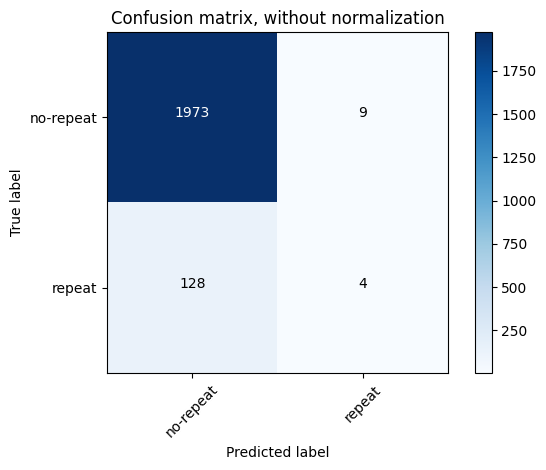

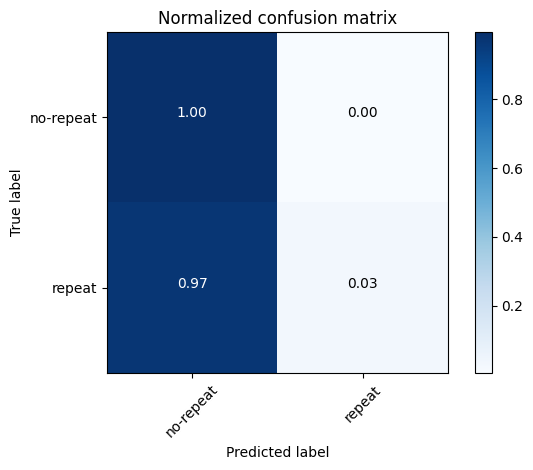

In [76]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# label name
class_names = ['no-repeat', 'repeat']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
clf = RandomForestClassifier(n_jobs=-1)
y_pred = clf.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2) # 设置了打印混淆矩阵时的浮点数精度为两位小数

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### 代码解释。

**函数`plot_confusion_matrix`解释**：
- 形参`cm`是混淆矩阵的数据，`classes`是分类标签的列表。
- `normalize`参数指示是否应该归一化混淆矩阵。如果设为`True`，函数则会将每一行的值除以其总和，结果是每一行的数值和为1，这有助于理解每个真实标签的预测分布。
- `title`是图表的标题，默认为'Confusion matrix'。
- `cmap=plt.cm.Blues`定义了图表使用的颜色映射，默认为蓝色调。

函数内部的步骤包括：
1. 若进行标准化，则对混淆矩阵的每个元素进行规范化，将每一行的值除以该行的总和，并打印“Normalized confusion matrix”（标准化混淆矩阵）。
2. 若不标准化，则打印“Confusion matrix, without normalization”（未标准化的混淆矩阵）。
3. 打印混淆矩阵`cm`的数值。
4. 使用`plt.imshow`绘制混淆矩阵的热图，并根据标准化与否设置适当的标题、颜色条卷及颜色映射。
5. `plt.xticks`和`plt.yticks`设置x轴和y轴的刻度标签，旋转x轴标签以便于阅读。
6. 使用一个循环在热图上标记每个格子的数值。颜色根据数值与混淆矩阵最大值的一半相比是否较大而决定，以便数值在视觉上更容易区分。
7. 设定x轴和y轴的标签分别为'Predicted label'和'True label'，并调用`plt.tight_layout()`确保布局正确。

In [77]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# label name
class_names = ['no-repeat', 'repeat']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
clf = RandomForestClassifier(n_jobs=-1)
y_pred = clf.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

   no-repeat       0.94      1.00      0.97      1982
      repeat       0.30      0.02      0.04       132

    accuracy                           0.94      2114
   macro avg       0.62      0.51      0.50      2114
weighted avg       0.90      0.94      0.91      2114



# 6 不同的分类模型

## 1 逻辑回归模型

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
X = stdScaler.fit_transform(train) # 标准化

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0)

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
clf.score(X_test, y_test)

0.9380321665089877

#### 代码解释

`LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')`参数解释

1. `random_state=0`：设置随机数种子为0，这样可以在重复运行代码时获得相同的结果。这对于模型的训练和测试是非常有用的。

2. `solver='lbfgs'`：选择优化算法为L-BFGS。L-BFGS是一种收敛速度较快的优化算法，适用于大规模问题。在这个例子中，我们使用L-BFGS来寻找最优的模型参数。

3. `multi_class='multinomial'`：设置多分类方式为多类分类器。多类分类器是一种常用的分类方式，它可以处理多类分类问题，例如按钮 clicks、广告点击率预测等。在这个例子中，我们使用多类分类器来预测不同类型的标签。


## 2.KNN 模型

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
X = stdScaler.fit_transform(train)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0)

clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9252601702932829

In [80]:
# clf.predict(X_test)

In [81]:
# clf.predict_proba(X_test)

## 3.高斯贝叶斯模型

In [82]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
X = stdScaler.fit_transform(train)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0)

clf = GaussianNB().fit(X_train, y_train)
clf.score(X_test, y_test)

0.3793755912961211

## 4.决策树模型

In [83]:
from sklearn import tree

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8684957426679281

## 5.Bagging模型
基模型为KNN

In [84]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)
clf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9375591296121097

## 6.随机森林模型

In [85]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)
clf = clf = RandomForestClassifier(n_estimators=10, max_depth=3, min_samples_split=12, random_state=0)

clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9375591296121097

## 7.极端随机树模型

In [86]:
from sklearn.ensemble import ExtraTreesClassifier

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9309366130558183

In [87]:
clf.n_features_

229

In [88]:
clf.feature_importances_[:10]

array([0.08, 0.02, 0.01, 0.02, 0.02, 0.01, 0.01, 0.02, 0.02, 0.01])

## 8.AdaBoost模型

In [89]:
from sklearn.ensemble import AdaBoostClassifier

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)
clf = AdaBoostClassifier(n_estimators=10)

clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9375591296121097

## 9.GBDT模型

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=0)

clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9375591296121097

## 10.集成学习
VOTE模型投票

In [91]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
X = stdScaler.fit_transform(train)
y = target


clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.93 (+/- 0.00) [Logistic Regression]
Accuracy: 0.93 (+/- 0.00) [Random Forest]
Accuracy: 0.39 (+/- 0.02) [naive Bayes]
Accuracy: 0.93 (+/- 0.00) [Ensemble]


## 11.LGB 模型

In [92]:
import lightgbm

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.4, random_state=0)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

clf = lightgbm

train_matrix = clf.Dataset(X_train, label=y_train)
test_matrix = clf.Dataset(X_test, label=y_test)
params = {
          'boosting_type': 'gbdt',
          #'boosting_type': 'dart',
          'objective': 'multiclass',
          'metric': 'multi_logloss',
          'min_child_weight': 1.5,
          'num_leaves': 2**5,
          'lambda_l2': 10,
          'subsample': 0.7,
          'colsample_bytree': 0.7,
          'colsample_bylevel': 0.7,
          'learning_rate': 0.03,
          'tree_method': 'exact',
          'seed': 2017,
          "num_class": 2,
          'silent': True,
          }
num_round = 10000
model = clf.train(params, 
                  train_matrix,
                  num_round,
                  valid_sets=test_matrix,
                  callbacks=[lightgbm.early_stopping(stopping_rounds=100)]
                  )
pre= model.predict(X_valid,num_iteration=model.best_iteration)

[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14861
[LightGBM] [Info] Number of data points in the train set: 5073, number of used features: 128
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Start training from score -0.073183
[LightGBM] [Info] Start training from score -2.651155
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0

In [93]:
print('score : ', np.mean((pre[:,1]>0.5)==y_valid))

score :  0.937906564163217


## 12.XGB 模型

In [94]:
import xgboost

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.4, random_state=0)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

clf = xgboost

train_matrix = clf.DMatrix(X_train, label=y_train, missing=-1)
test_matrix = clf.DMatrix(X_test, label=y_test, missing=-1)
z = clf.DMatrix(X_valid, label=y_valid, missing=-1)
params = {'booster': 'gbtree',
          'objective': 'multi:softprob',
          'eval_metric': 'mlogloss',
          'gamma': 1,
          'min_child_weight': 1.5,
          'max_depth': 5,
          'lambda': 100,
          'subsample': 0.7,
          'colsample_bytree': 0.7,
          'colsample_bylevel': 0.7,
          'eta': 0.03,
          'tree_method': 'exact',
          'seed': 2017,
          "num_class": 2
          }

num_round = 10000
early_stopping_rounds = 100
watchlist = [(train_matrix, 'train'),
             (test_matrix, 'eval')
             ]

model = clf.train(params,
                  train_matrix,
                  num_boost_round=num_round,
                  evals=watchlist,
                  early_stopping_rounds=early_stopping_rounds
                  )
pre = model.predict(z,ntree_limit=model.best_ntree_limit)

[0]	train-mlogloss:0.67238	eval-mlogloss:0.67217
[1]	train-mlogloss:0.65289	eval-mlogloss:0.65242
[2]	train-mlogloss:0.63431	eval-mlogloss:0.63365
[3]	train-mlogloss:0.61685	eval-mlogloss:0.61596
[4]	train-mlogloss:0.60012	eval-mlogloss:0.59903
[5]	train-mlogloss:0.58426	eval-mlogloss:0.58297
[6]	train-mlogloss:0.56939	eval-mlogloss:0.56791
[7]	train-mlogloss:0.55522	eval-mlogloss:0.55357
[8]	train-mlogloss:0.54170	eval-mlogloss:0.53987
[9]	train-mlogloss:0.52883	eval-mlogloss:0.52679
[10]	train-mlogloss:0.51660	eval-mlogloss:0.51442
[11]	train-mlogloss:0.50503	eval-mlogloss:0.50268


[12]	train-mlogloss:0.49392	eval-mlogloss:0.49143
[13]	train-mlogloss:0.48329	eval-mlogloss:0.48066
[14]	train-mlogloss:0.47329	eval-mlogloss:0.47053
[15]	train-mlogloss:0.46368	eval-mlogloss:0.46076
[16]	train-mlogloss:0.45449	eval-mlogloss:0.45142
[17]	train-mlogloss:0.44577	eval-mlogloss:0.44255
[18]	train-mlogloss:0.43735	eval-mlogloss:0.43401
[19]	train-mlogloss:0.42935	eval-mlogloss:0.42590
[20]	train-mlogloss:0.42171	eval-mlogloss:0.41811
[21]	train-mlogloss:0.41444	eval-mlogloss:0.41081
[22]	train-mlogloss:0.40740	eval-mlogloss:0.40367
[23]	train-mlogloss:0.40070	eval-mlogloss:0.39691
[24]	train-mlogloss:0.39427	eval-mlogloss:0.39038
[25]	train-mlogloss:0.38817	eval-mlogloss:0.38422
[26]	train-mlogloss:0.38238	eval-mlogloss:0.37840
[27]	train-mlogloss:0.37671	eval-mlogloss:0.37272
[28]	train-mlogloss:0.37138	eval-mlogloss:0.36730
[29]	train-mlogloss:0.36624	eval-mlogloss:0.36210
[30]	train-mlogloss:0.36128	eval-mlogloss:0.35708
[31]	train-mlogloss:0.35652	eval-mlogloss:0.35228


In [95]:
print('score : ', np.mean((pre[:,1]>0.3)==y_valid))

score :  0.937906564163217


# 7 自己封装模型

## 7.1 Stacking,Bootstrap,Bagging技术实践

In [96]:
"""
    导入相关包
"""
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [97]:
class SBBTree():
    """
        SBBTree
        Stacking,Bootstap,Bagging
    """
    def __init__(
                    self, 
                    params,
                    stacking_num,
                    bagging_num,
                    bagging_test_size,
                    num_boost_round,
                    callbacks
                ):
        """
            Initializes the SBBTree.
            Args:
              params : lgb params.
              stacking_num : k_flod stacking.
              bagging_num : bootstrap num.
              bagging_test_size : bootstrap sample rate.
              num_boost_round : boost num.
              callbacks: callbacks=[lightgbm.early_stopping(stopping_rounds=200)
        """
        self.params = params
        self.stacking_num = stacking_num
        self.bagging_num = bagging_num
        self.bagging_test_size = bagging_test_size
        self.num_boost_round = num_boost_round
        self.callbacks = callbacks

        self.model = lgb
        self.stacking_model = []
        self.bagging_model = []

    def fit(self, X, y):
        """ fit model. """
        if self.stacking_num > 1:
            layer_train = np.zeros((X.shape[0], 2))
            self.SK = StratifiedKFold(n_splits=self.stacking_num, shuffle=True, random_state=1)
            for k,(train_index, test_index) in enumerate(self.SK.split(X, y)):
                X_train = X[train_index]
                y_train = y[train_index]
                X_test = X[test_index]
                y_test = y[test_index]

                lgb_train = lgb.Dataset(X_train, y_train)
                lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

                gbm = lgb.train(self.params,
                            lgb_train,
                            num_boost_round=self.num_boost_round,
                            valid_sets=lgb_eval,
                            callbacks=self.callbacks
                            )

                self.stacking_model.append(gbm)

                pred_y = gbm.predict(X_test, num_iteration=gbm.best_iteration)
                layer_train[test_index, 1] = pred_y

            X = np.hstack((X, layer_train[:,1].reshape((-1,1)))) 
        else:
            pass
        for bn in range(self.bagging_num):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.bagging_test_size, random_state=bn)

            lgb_train = lgb.Dataset(X_train, y_train)
            lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


            gbm = lgb.train(self.params,
                        lgb_train,
                        num_boost_round=10000,
                        valid_sets=lgb_eval,
                        callbacks=[lightgbm.early_stopping(stopping_rounds=200)]
                        )

            self.bagging_model.append(gbm)

    def predict(self, X_pred):
        """ predict test data. """
        if self.stacking_num > 1:
            test_pred = np.zeros((X_pred.shape[0], self.stacking_num))
            for sn,gbm in enumerate(self.stacking_model):
                pred = gbm.predict(X_pred, num_iteration=gbm.best_iteration)
                test_pred[:, sn] = pred
            X_pred = np.hstack((X_pred, test_pred.mean(axis=1).reshape((-1,1))))  
        else:
            pass 
        for bn,gbm in enumerate(self.bagging_model):
            pred = gbm.predict(X_pred, num_iteration=gbm.best_iteration)
            if bn == 0:
                pred_out=pred
            else:
                pred_out+=pred
        return pred_out/self.bagging_num

#### 代码解释
这段代码定义了一个名为`SBBTree`类，表示Stacking, Bootstrap, Bagging这三种集成学习算法的组合。代码中使用了LightGBM框架来训练模型。

详细解释：

**类 `SBBTree`：**
-  `__init__` 方法：
  
   类的构造函数用于初始化`SBBTree`对象，它接受以下参数：
   
   - `params`：LightGBM模型的参数。
   - `stacking_num`：堆叠的次数，用于k折交叉验证中。
   - `bagging_num`：Bagging的次数，即bootstrapping的样本集的数量。
   - `bagging_test_size`：bootstrapping时测试集的比例。
   - `num_boost_round`：boosting迭代次数。
   - `callbacks`：回调函数，用于训练过程中提供一些操作，例如早停止。

  构造函数内部将传入的参数赋值给类的属性，并初始化了两个列表，`stacking_model`和`bagging_model`，分别用于存储来自堆叠的模型和bagging的模型。

- `fit` 方法：

  用来训练SBBTree模型。这个方法首先检查如果`stacking_num`大于1，就会执行k折堆叠，每次迭代都训练一个新的模型并将其添加到`stacking_model`列表，并且保留预测结果。所有折的预测结果平均后，作为新的特征添加到原有的特征集中。如果`stacking_num`等于1，预测结果作为新的特征是不被添加的。
  
  接下来的Bagging部分，代码通过`train_test_split`函数进行多次划分，每一次划分都训练一个新的LightGBM模型，并将每个模型添加到`bagging_model`列表中。

- `predict` 方法：

  用来预测输入的数据`X_pred`。如果`stacking_num`大于1，就会使用堆叠过程中得到的模型来对数据进行预测，并将结果平均后作为新特征，再和原始特征进行叠加。然后利用Bagging过程中得到的所有模型对叠加后的特征数据集进行预测。最后，所有Bagging模型的预测结果将求平均值返回最终的预测结果。如果`stacking_num`等于1，则没有对原始特征叠加新特征的步骤。

该类结合了三种集成算法来提升模型的泛化能力和性能。堆叠（Stacking）是通过将模型的预测结果作为新的特征来训练上层模型；Bootstrap是通过从原数据集中随机抽样来生成新的数据集；Bagging是通过并行地训练多个模型并组合它们的预测结果来减小方差。

这种组合方式通常可以让模型在多样性和稳定性上取得更好的平衡，从而提高预测的准确率。

## 7.2 测试自己封装的模型类

In [108]:
"""
    TEST CODE
"""
from sklearn.datasets import make_gaussian_quantiles
from sklearn import metrics
X, y = make_gaussian_quantiles(mean=None, cov=1.0, n_samples=1000, n_features=50, n_classes=2, shuffle=True, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'auc',
        'num_leaves': 9,
        'learning_rate': 0.03,
        'feature_fraction_seed': 2,
        'feature_fraction': 0.9,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'min_data': 20,
        'min_hessian': 1,
        'verbose': -1,
        'silent': 0
        }
# test 1
model = SBBTree(params, stacking_num=2, bagging_num=1,  bagging_test_size=0.33, num_boost_round=10000, callbacks=[lightgbm.early_stopping(stopping_rounds=200)])
model.fit(X,y)
X_pred = X[0].reshape((1,-1))
pred=model.predict(X_pred)
print('pred')
print(pred)
print('TEST 1 ok')


# test 1
model = SBBTree(params, stacking_num=1, bagging_num=1, bagging_test_size=0.33, num_boost_round=10000, callbacks=[lightgbm.early_stopping(stopping_rounds=200)])
model.fit(X_train,y_train)
pred1=model.predict(X_test)

# test 2 
model = SBBTree(params, stacking_num=1, bagging_num=3, bagging_test_size=0.33, num_boost_round=10000, callbacks=[lightgbm.early_stopping(stopping_rounds=200)])
model.fit(X_train,y_train)
pred2=model.predict(X_test)

# test 3 
model = SBBTree(params, stacking_num=5, bagging_num=1, bagging_test_size=0.33, num_boost_round=10000, callbacks=[lightgbm.early_stopping(stopping_rounds=200)])
model.fit(X_train,y_train)
pred3=model.predict(X_test)

# test 4 
model = SBBTree(params, stacking_num=5, bagging_num=3, bagging_test_size=0.33, num_boost_round=10000, callbacks=[lightgbm.early_stopping(stopping_rounds=200)])
model.fit(X_train,y_train)
pred4=model.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test+1, pred1, pos_label=2)
print('auc: ',metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_test+1, pred2, pos_label=2)
print('auc: ',metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_test+1, pred3, pos_label=2)
print('auc: ',metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_test+1, pred4, pos_label=2)
print('auc: ',metrics.auc(fpr, tpr))


# auc:  0.7281621243885396
# auc:  0.7710471146419509
# auc:  0.7894369046305492
# auc:  0.8084519474787597

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[565]	valid_0's auc: 0.761952
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[598]	valid_0's auc: 0.789344
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[480]	valid_0's auc: 0.808629
pred
[0.12]
TEST 1 ok
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[259]	valid_0's auc: 0.75051
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[259]	valid_0's auc: 0.75051
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[401]	valid_0's auc: 0.769037
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[368]	valid_0's auc: 0.766177
Training until validation scores don't improve for 200 rounds
Early stopping, best iteratio

#### 代码解释
这段测试代码使用了之前定义的`SBBTree`类，该类是用于构建、训练和预测一个集成学习模型，结合了Stacking、Bootstrap和Bagging策略。

**测试代码的步骤包括：**

1. 导入`make_gaussian_quantiles`函数用于生成一个高斯分布的合成数据集，和`metrics`模块用于评估模型性能。

2. 生成一个含1000个样本、每个样本具有50个特征的数据集，并且标签类别为2。

3. 使用`train_test_split`把数据集分割成训练集和测试集，测试集大小占33%。

4. 设置LightGBM模型相关的参数`params`的字典，包括任务类型、梯度提升类型、目标函数、评价指标等。

    - `task`：指定当前的任务类型，可以是`train`（训练）或`predict`（预测）。
    - `boosting_type`：指定提升类型，可以是`gbdt`（梯度提升树）。
    - `objective`：指定目标函数，可以是`binary`（二分类）。
    - `metric`：指定评估指标，可以是`auc`（Area Under the Curve）。
    - `num_leaves`：指定叶子节点数。
    - `learning_rate`：指定学习率。
    - `feature_fraction_seed`：指定特征fraction的随机种子。
    - `feature_fraction`：指定特征fraction。
    - `bagging_fraction`：指定baggingfraction。
    -  `bagging_freq`：指定bagging频率。
    -  `min_data`：指定每个叶子节点上最少的数据样本数。
    -  `min_hessian`：指定每个叶子节点上最小的Hessian值。
    -  `verbose`：指定是否显示日志信息，可以是`-1`（不显示）或`0`（显示）。
    -  `silent`：指定是否静默模式，可以是`0`（不静默）或`1`（静默）。


5. 进行四个不同设置的测试：
    - `test 1`: `stacking_num=2`, `bagging_num=1`
    - `test 1`: `stacking_num=1`, `bagging_num=1`
    - `test 2`: `stacking_num=1`, `bagging_num=3`
    - `test 3`: `stacking_num=5`, `bagging_num=1`
    - `test 4`: `stacking_num=5`, `bagging_num=3`

    每个测试都实例化了一个`SBBTree`模型，使用提供的参数进行训练，并对测试集进行预测。

6. 对每个测试的预测结果，使用`roc_curve`计算真正率（TPR）和假正率（FPR），再使用`metrics.auc`计算AUC值，并打印出来。`y_test+1`和`pos_label=2`的部分是为了使得二元分类的标签与`metrics`模块的默认正类标签匹配。

这段代码的目标是评估`SBBTree`不同的堆叠和装袋配置对模型性能（特别是AUC分数）的影响，并打印出模型预测的示例。通过改变堆叠数和装袋数，能看到模型在不同设置下的性能如何变化。

# 8 天猫复购场景实战

## 8.1读取特征数据

In [99]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

train_data = pd.read_csv('./data/train_all.csv',nrows=10000)
test_data = pd.read_csv('./data/test_all.csv',nrows=100)

features_columns = [col for col in train_data.columns if col not in ['user_id','label']]
train = train_data[features_columns].values
test = test_data[features_columns].values
target =train_data['label'].values

## 8.2设置模型参数

In [100]:
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'auc',
        'num_leaves': 9,
        'learning_rate': 0.03,
        'feature_fraction_seed': 2,
        'feature_fraction': 0.9,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'min_data': 20,
        'min_hessian': 1,
        'verbose': -1,
        'silent': 0
        }

model = SBBTree(params=params,
                stacking_num=5,
                bagging_num=3,
                bagging_test_size=0.33,
                num_boost_round=10000,
                callbacks=[lightgbm.early_stopping(stopping_rounds=200)]
                )

## 8.3模型训练

In [101]:
model.fit(train, target)

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.58627
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.589063
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.56119
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.520856
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.558685
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.576137
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.533978
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.562

## 8.4预测结果

In [102]:
pred = model.predict(test)
df_out = pd.DataFrame()
df_out['user_id'] = test_data['user_id'].astype(int)
df_out['predict_prob'] = pred
df_out.head()

,user_id,predict_prob
0,105600,0.064700
1,110976,0.069873
2,374400,0.069219
3,189312,0.064055
4,189312,0.063837


## 8.5保存结果

In [103]:
"""
    保留数据头，不保存index
"""
df_out.to_csv('./data/df_out.csv',header=True,index=False)
print('save OK!')

save OK!
